# ConvexHull Tugas Kecil STIMA 2
> Made by Rifqi Naufal Abdjul (13520062)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### ConvexHull Libraries
On comparing other convex Hull, You can use the scipy library or the hand-built one

In [2]:
# Scipy library
# from scipy.spatial import ConvexHull

In [3]:
import numpy as np

# Fungsi quicksort yang diubah sedikit algoritma dari quicksort biasa agar lebih efisien


def quicksort(arr, key=lambda x: x):
    if len(arr) <= 1:
        return arr
    pivot = key(arr[0])
    left = [x for x in arr[1:] if key(x) <= pivot]
    right = [x for x in arr[1:] if key(x) >= pivot]
    return quicksort(left, key) + [arr[0]] + quicksort(right, key)

# Fungsi untuk mencari jarak antar 2 point


def get_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Predikat untuk menentukan apakah point di atas atau dibawah garis yang dibentuk ref1,ref2
# Ref1[0] selalu lebih kecil daripada Ref2[0]


def isAboveOrBelow(ref1, ref2, point):
    # Jika garis referensi perfectly vertical
    if (ref1[0] - ref2[0] == 0):
        if (point[0] < ref1[0]):
            return "Above"
        elif (point[0] > ref1[0]):
            return "Below"
        else:
            return "On"
    grad = (ref1[1] - ref2[1]) / (ref1[0] - ref2[0])
    # Merupakan nilai x yang di dalam garis
    yline = ref1[1] + grad * (point[0] - ref1[0])
    if point[1] > yline:
        return "Above"
    elif point[1] < yline:
        return "Below"
    else:
        return "On"

# Kelas ConvexHull yang dapat di gunakan untuk mendapatkan convex hull dari data


class ConvexHull:
    # Constructor, dengan anggapan points merupakan array dari points (array of (X, Y))
    def __init__(self, points):
        self.points = np.array(points)
        self.hull = np.array(ConvexHull.get_hull(self.points))

    @staticmethod
    # Dianggap points yang sudah masuk telah di sort oleh fungsi get_hull
    def __get_top_hull(points):
        if len(points) <= 2:
            return points
        first = points[0]
        last = points[-1]
        # Mencari titik yang paling atas

        top = max(points, key=lambda x: get_distance(
            x, first) + get_distance(x, last))

        # Left Top merupakan titik yang di atas titik first, dan top
        # Right Top merupakan titik yang di atas titik top, dan last
        left_top = [first]
        right_top = [top]
        for i in range(1, len(points) - 1):
            if (isAboveOrBelow(top, first, points[i]) == "Above"):
                left_top.append(points[i])
            if (isAboveOrBelow(top, last, points[i]) == "Above"):
                right_top.append(points[i])
        left_top.append(top)
        right_top.append(last)

        # Mengembalikan hull dari kiri dan kanan
        return ConvexHull.__get_top_hull(left_top) + ConvexHull.__get_top_hull(right_top)

    @staticmethod
    # Dianggap points yang sudah masuk telah di sort oleh fungsi get_hull
    def __get_bottom_hull(points):
        if len(points) <= 2:
            return points
        first = points[0]
        last = points[-1]
        # Mencari titik yang paling atas

        bot = max(points, key=lambda x: get_distance(
            x, first) + get_distance(x, last))

        # Left Bot merupakan titik yang di bawah titik first, dan bot
        # Right Bot merupakan titik yang di bawah titik bot, dan last
        left_bot = [first]
        right_bot = [bot]
        for i in range(1, len(points) - 1):
            if (isAboveOrBelow(bot, first, points[i]) == "Below"):
                left_bot.append(points[i])
            if (isAboveOrBelow(bot, last, points[i]) == "Below"):
                right_bot.append(points[i])
        left_bot.append(bot)
        right_bot.append(last)

        # Mengembalikan hull dari kiri dan kanan
        return ConvexHull.__get_bottom_hull(left_bot) + ConvexHull.__get_bottom_hull(right_bot)

    @staticmethod
    # Merupakan fungsi utama yang mencari hull dari points
    def get_hull(points):
        # Mengurutkan points berdasarkan x
        points = quicksort(points, key=lambda x: (x[0],x[1]))

        # Mendapatkan titik pertama dan terakhi sebagai acuan
        first = points[0]
        last = points[-1]

        # Mendapatkan Hull atas dan Bawah secara Divide and Conquer
        top = [first] + [x for x in points[1:-1]
                         if isAboveOrBelow(first, last, x) == "Above"] + [last]
        bottom = [first] + [x for x in points[1:-1]
                            if isAboveOrBelow(first, last, x) == "Below"] + [last]
        res = (ConvexHull.__get_top_hull(
            top))[::-1] + ConvexHull.__get_bottom_hull(bottom)

        # Merapihkan Hull menjadi bentuk simplices agar lebih mudah untuk di gambarkan
        hull_points = [x for idx, x in enumerate(res) if idx % 2 == 0]
        simplices = []
        for i in range(len(hull_points)):
            simplices.append([hull_points[i-1], hull_points[i]])
        return simplices


## Testing the Libraries

### Data 1 (Iris Datasets)

In [4]:
# Load and inspect the data
data = datasets.load_iris()

# Import into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target
print("Data size:",df.shape)
df.head()


Data size: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


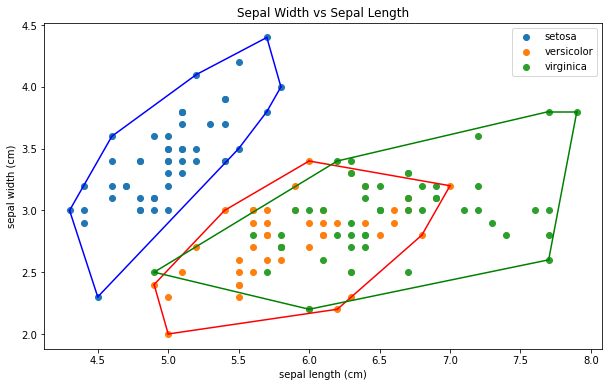

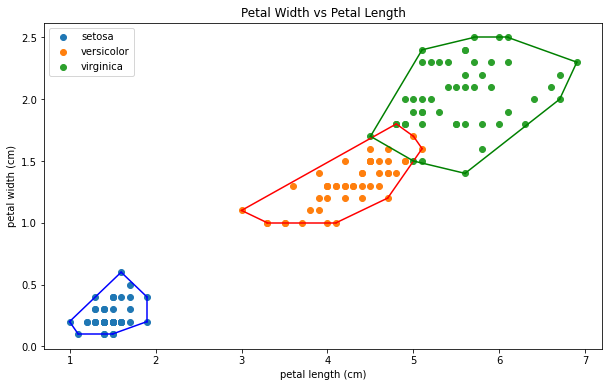

In [5]:
# Visualize the datasets

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = ConvexHull(bucket)
  plt.scatter(hull.points[:, 0], hull.points[:, 1], label=data.target_names[i])
  for k in range(len(hull.hull)):
    plt.plot(hull.hull[k][:,0], hull.hull[k][:,1], colors[i])
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,3]].values
  hull = ConvexHull(bucket)
  plt.scatter(hull.points[:, 0], hull.points[:, 1], label=data.target_names[i])
  for k in range(len(hull.hull)):
    plt.plot(hull.hull[k][:,0], hull.hull[k][:,1], colors[i])
plt.legend()
plt.show()


### Data 2 (Wine Datasets)

In [6]:
# Load and inspect the data
data = datasets.load_wine()

# Import into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target
print("Data size:",df.shape)
df.head()

Data size: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


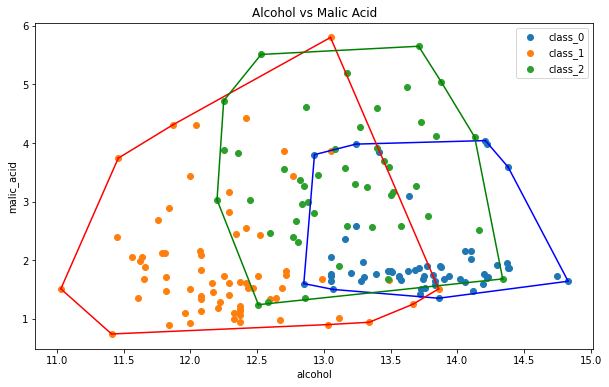

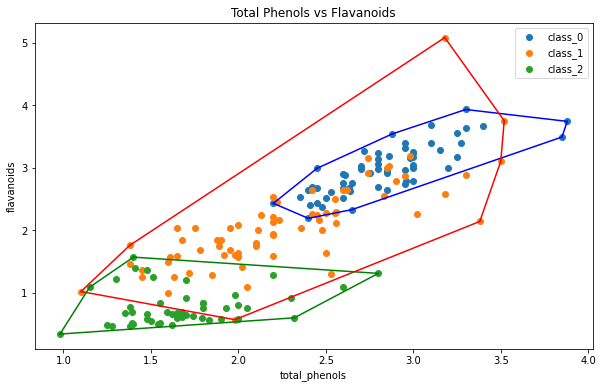

In [8]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = ConvexHull(bucket)
  plt.scatter(hull.points[:, 0], hull.points[:, 1], label=data.target_names[i])
  for k in range(len(hull.hull)):
    plt.plot(hull.hull[k][:,0], hull.hull[k][:,1], colors[i])
plt.legend()
plt.show()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Total Phenols vs Flavanoids')
plt.xlabel(data.feature_names[5])
plt.ylabel(data.feature_names[6])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[5,6]].values
  hull = ConvexHull(bucket)
  plt.scatter(hull.points[:, 0], hull.points[:, 1], label=data.target_names[i])
  for k in range(len(hull.hull)):
    plt.plot(hull.hull[k][:,0], hull.hull[k][:,1], colors[i])
plt.legend()
plt.show()